In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import preprocessing
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [99]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class']
iris = pd.read_csv(url, names=columns)
iris = pd.DataFrame(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class'], dtype='object')

In [101]:
iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [102]:
## drop target column
iris2 = iris.copy()       #drop(['target'], axis =1)
iris2

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [103]:
#list of distinct variables 
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [104]:
## drop target column
iris = iris.drop(['Class'], axis =1)
iris


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

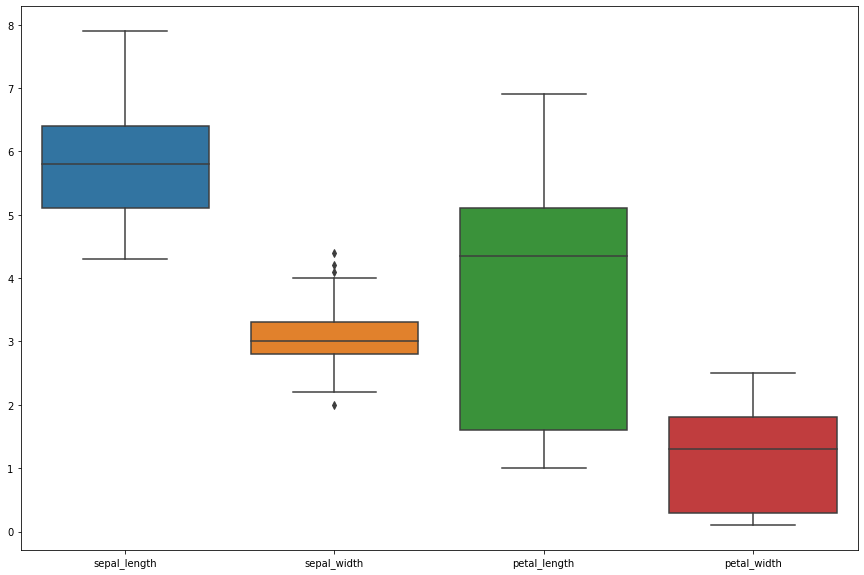

In [105]:

## Checking for any outliers
iris2
plt.figure(figsize=(15,10))
sns.boxplot(data = iris2)

In [50]:
##spliting dataset
y = iris['Class'] ##Target Variable
X = iris.drop('Class', axis=1) ##Feature Variable

In [51]:
## Target values
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [52]:
# features
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### FEATURE SELECTION

In [53]:
corr = X.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


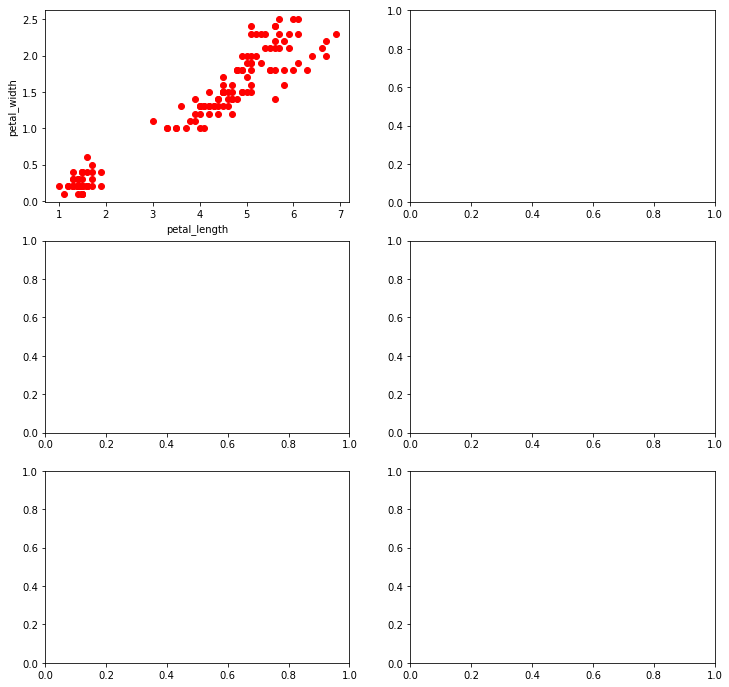

In [54]:
# sns.heatmap(corr)

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
axes[ax1][ax2].scatter(iris2[iris2.columns[i]], iris2[iris2.columns[j]], color='red')
axes[ax1][ax2].set_xlabel(iris2.columns[i])
axes[ax1][ax2].set_ylabel(iris2.columns[j])
index = index + 1

In [55]:
corr.shape[0]

4

In [56]:
data = X.iloc[:]
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
abs(data.corr()) ## absolute values of the data

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.109369,0.871754,0.817954
sepal_width,0.109369,1.000000,0.420516,0.356544
petal_length,0.871754,0.420516,1.000000,0.962757
petal_width,0.817954,0.356544,0.962757,1.000000


In [58]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
new_data = data[selected_columns]

new_data

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [61]:
Selected_Feature_data = iris.drop(['petal_width'],axis = 1)
Selected_Feature_data

,sepal_length,sepal_width,petal_length,Class
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica


### Label Encoder to encode the class target variables to numeric values.

In [63]:
##Encode categorical values to numbers
label_encoder = LabelEncoder()
Selected_Feature_data.iloc[:,-1] = label_encoder.fit_transform(Selected_Feature_data.iloc[:,-1]).astype('float64')
Selected_Feature_data

,sepal_length,sepal_width,petal_length,Class
0,5.1,3.5,1.4,0.0
1,4.9,3.0,1.4,0.0
2,4.7,3.2,1.3,0.0
3,4.6,3.1,1.5,0.0
4,5.0,3.6,1.4,0.0
...,...,...,...,...
145,6.7,3.0,5.2,2.0
146,6.3,2.5,5.0,2.0
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.0


In [97]:
# View count of each class
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### Model Evaluation

In [96]:
# Split features and target into train and test sets into (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)


In [91]:
X_train.shape


(105, 4)

In [92]:
y_train.shape


(105,)

In [93]:
y_train.shape


(105,)

In [94]:
y_test.shape

(45,)

### RANDOM FOREST

In [80]:

# importing required libraries
# importing Scikit-learn library and datasets package
from sklearn import datasets 


In [83]:

# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)


# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [88]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier


iris = pd.DataFrame(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.9333333333333333
